In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cd /content/drive/MyDrive/Deep_learning_assignments

/content/drive/MyDrive/Deep_learning_assignments


In [6]:
data = pd.read_csv("ML_Datasets-main/creditcard.csv")

In [8]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [12]:
data.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [13]:
data.reset_index(drop=True, inplace=True)
labels = data.pop('Class')

In [14]:
data -= data.mean()
data /= data.std()

In [16]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996580,-0.694241,-0.044075,1.672771,0.973364,-0.245116,0.347067,0.193679,0.082637,0.331127,0.083385,-0.540406,-0.618295,-0.996097,-0.324610,1.604011,-0.536832,0.244863,0.030770,0.496281,0.326117,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330891,-0.063781,0.244964
1,-1.996580,0.608495,0.161176,0.109797,0.316522,0.043483,-0.061820,-0.063700,0.071253,-0.232494,-0.153349,1.580000,1.066087,0.491417,-0.149982,0.694359,0.529433,-0.135170,-0.218762,-0.179086,-0.089611,-0.307376,-0.880075,0.162201,-0.561130,0.320693,0.261069,-0.022256,0.044607,-0.342474
2,-1.996558,-0.693499,-0.811576,1.169466,0.268231,-0.364571,1.351451,0.639775,0.207372,-1.378673,0.190699,0.611829,0.066137,0.720699,-0.173114,2.562902,-3.298230,1.306866,-0.144790,-2.778556,0.680974,0.337631,1.063356,1.456317,-1.138090,-0.628536,-0.288446,-0.137137,-0.181021,1.160684
3,-1.996558,-0.493324,-0.112169,1.182514,-0.609726,-0.007469,0.936148,0.192070,0.316017,-1.262501,-0.050468,-0.221891,0.178371,0.510168,-0.300360,-0.689836,-1.209294,-0.805443,2.345300,-1.514202,-0.269855,-0.147443,0.007267,-0.304776,-1.941024,1.241902,-0.460217,0.155396,0.186188,0.140534
4,-1.996537,-0.591329,0.531540,1.021410,0.284655,-0.295015,0.071998,0.479301,-0.226510,0.744325,0.691624,-0.806145,0.538626,1.352242,-1.168031,0.191323,-0.515204,-0.279080,-0.045569,0.987036,0.529938,-0.012839,1.100009,-0.220123,0.233250,-0.395201,1.041609,0.543619,0.651815,-0.073403


In [17]:
#Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

In [19]:
data_len = len(data)
train_data = data.iloc[:data_len*50//100]
val_data = data.iloc[data_len*50//100:data_len*70//100]
test_data = data.iloc[data_len*70//100:]
labels_len = len(labels)
train_labels = labels.iloc[:labels_len*50//100]
val_labels = labels.iloc[labels_len*50//100:labels_len*70//100]
test_labels = labels.iloc[labels_len*70//100:]

In [20]:
#Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & 
#Output Layer with activation function relu/tanh (check by experiment).

In [21]:
from tensorflow.keras import models
from tensorflow.keras import layers
import tensorflow as tf

network = models.Sequential()
network.add(layers.Dense(10,activation="tanh",input_shape=(len(train_data.columns),) ))
network.add(layers.Dense(8,activation="tanh",input_shape=(data.shape[1],) ))
network.add(layers.Dense(6,activation="tanh",input_shape=(data.shape[1],) ))
network.add(layers.Dense(1,activation="sigmoid"))
network.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [22]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                310       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 459
Trainable params: 459
Non-trainable params: 0
_________________________________________________________________


In [23]:
MODEL = network.fit(train_data,train_labels,epochs=10,batch_size=256,validation_data=(val_data,val_labels))

Epoch 1/10
557/557 [==============================] - 2s 2ms/step - loss: 0.2297 - acc: 0.9008 - val_loss: 1.0132 - val_acc: 0.6660
Epoch 2/10
557/557 [==============================] - 1s 2ms/step - loss: 0.0055 - acc: 0.9991 - val_loss: 0.9301 - val_acc: 0.7238
Epoch 3/10
557/557 [==============================] - 1s 2ms/step - loss: 0.0036 - acc: 0.9993 - val_loss: 0.9308 - val_acc: 0.7359
Epoch 4/10
557/557 [==============================] - 1s 2ms/step - loss: 0.0044 - acc: 0.9992 - val_loss: 0.9875 - val_acc: 0.7295
Epoch 5/10
557/557 [==============================] - 1s 2ms/step - loss: 0.0033 - acc: 0.9993 - val_loss: 0.9391 - val_acc: 0.7364
Epoch 6/10
557/557 [==============================] - 1s 2ms/step - loss: 0.0033 - acc: 0.9994 - val_loss: 0.8471 - val_acc: 0.7589
Epoch 7/10
557/557 [==============================] - 1s 2ms/step - loss: 0.0029 - acc: 0.9995 - val_loss: 0.8201 - val_acc: 0.7671
Epoch 8/10
557/557 [==============================] - 1s 2ms/step - loss: 0.

In [24]:
test_loss , test_acc = network.evaluate(test_data,test_labels)

2671/2671 [==============================] - 3s 993us/step - loss: 1.1985 - acc: 0.6708


In [25]:
test_labels[test_labels == 1]

199896    1
201098    1
201601    1
203324    1
203328    1
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 108, dtype: int64

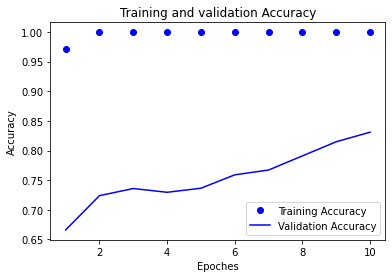

In [26]:
history_dict = MODEL.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epoches = np.arange(1,len(history_dict['acc'])+1)
plt.plot(epoches,acc_values,'bo',label="Training Accuracy")
plt.plot(epoches,val_acc_values,'b',label="Validation Accuracy")
plt.title('Training and validation Accuracy')
plt.xlabel("Epoches")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [27]:
#Doing With RELU

In [28]:
from tensorflow.keras import models
from tensorflow.keras import layers
import tensorflow as tf

network1 = models.Sequential()
network1.add(layers.Dense(30,activation="relu",input_shape=(len(train_data.columns),) ))
network1.add(layers.Dense(20,activation="relu" ))
network1.add(layers.Dense(10,activation="relu"))
network1.add(layers.Dense(1,activation="sigmoid"))

network1.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

MODEL1 = network1.fit(train_data,train_labels,epochs=10,batch_size=512,validation_data=(val_data,val_labels))

Epoch 1/10
279/279 [==============================] - 1s 3ms/step - loss: 0.3619 - acc: 0.8565 - val_loss: 0.0255 - val_acc: 0.9991
Epoch 2/10
279/279 [==============================] - 1s 2ms/step - loss: 0.0043 - acc: 0.9991 - val_loss: 0.0217 - val_acc: 0.9990
Epoch 3/10
279/279 [==============================] - 1s 2ms/step - loss: 0.0034 - acc: 0.9994 - val_loss: 0.0155 - val_acc: 0.9981
Epoch 4/10
279/279 [==============================] - 1s 2ms/step - loss: 0.0028 - acc: 0.9994 - val_loss: 0.0147 - val_acc: 0.9973
Epoch 5/10
279/279 [==============================] - 1s 2ms/step - loss: 0.0026 - acc: 0.9994 - val_loss: 0.0180 - val_acc: 0.9955
Epoch 6/10
279/279 [==============================] - 1s 2ms/step - loss: 0.0031 - acc: 0.9995 - val_loss: 0.0147 - val_acc: 0.9965
Epoch 7/10
279/279 [==============================] - 1s 2ms/step - loss: 0.0019 - acc: 0.9996 - val_loss: 0.0156 - val_acc: 0.9964
Epoch 8/10
279/279 [==============================] - 1s 2ms/step - loss: 0.

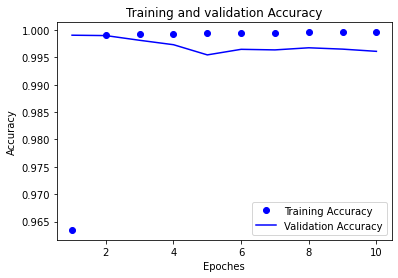

In [29]:
history_dict = MODEL1.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epoches = np.arange(1,len(history_dict['acc'])+1)
plt.plot(epoches,acc_values,'bo',label="Training Accuracy")
plt.plot(epoches,val_acc_values,'b',label="Validation Accuracy")
plt.title('Training and validation Accuracy')
plt.xlabel("Epoches")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [30]:
test_loss , test_acc = network1.evaluate(test_data,test_labels)

2671/2671 [==============================] - 3s 986us/step - loss: 0.0199 - acc: 0.9955


In [31]:
prediction_test_data = test_data
predictions = network1.predict(prediction_test_data)
hit = np.argmax(predictions) == np.array(test_labels)
print(f"{len(hit)} out of {len(predictions)} ")

85443 out of 85443 


In [35]:
network3 = models.Sequential()
network3.add(layers.Dense(10,activation="relu",input_shape=(len(train_data.columns),) ))
network3.add(layers.Dense(8,activation="relu" ))
network3.add(layers.Dense(6,activation="relu"))
network3.add(layers.Dense(1,activation="sigmoid"))

network3.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

MODEL3 = network3.fit(train_data,train_labels,epochs=50,batch_size=512,validation_data=(val_data,val_labels))

Epoch 1/50
279/279 [==============================] - 1s 3ms/step - loss: 0.7557 - acc: 0.5300 - val_loss: 0.1976 - val_acc: 0.9980
Epoch 2/50
279/279 [==============================] - 1s 2ms/step - loss: 0.0773 - acc: 0.9982 - val_loss: 0.0150 - val_acc: 0.9986
Epoch 3/50
279/279 [==============================] - 1s 2ms/step - loss: 0.0042 - acc: 0.9990 - val_loss: 0.0143 - val_acc: 0.9993
Epoch 4/50
279/279 [==============================] - 1s 2ms/step - loss: 0.0044 - acc: 0.9992 - val_loss: 0.0127 - val_acc: 0.9993
Epoch 5/50
279/279 [==============================] - 1s 2ms/step - loss: 0.0036 - acc: 0.9993 - val_loss: 0.0146 - val_acc: 0.9993
Epoch 6/50
279/279 [==============================] - 1s 2ms/step - loss: 0.0036 - acc: 0.9993 - val_loss: 0.0124 - val_acc: 0.9993
Epoch 7/50
279/279 [==============================] - 1s 2ms/step - loss: 0.0032 - acc: 0.9993 - val_loss: 0.0125 - val_acc: 0.9993
Epoch 8/50
279/279 [==============================] - 1s 2ms/step - loss: 0.

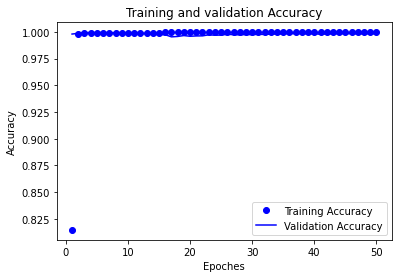

In [36]:
history_dict = MODEL3.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epoches = np.arange(1,len(history_dict['acc'])+1)
plt.plot(epoches,acc_values,'bo',label="Training Accuracy")
plt.plot(epoches,val_acc_values,'b',label="Validation Accuracy")
plt.title('Training and validation Accuracy')
plt.xlabel("Epoches")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [37]:
test_loss , test_acc = network3.evaluate(test_data,test_labels)

2671/2671 [==============================] - 3s 974us/step - loss: 0.0119 - acc: 0.9984


In [38]:
prediction_test_data = test_data
predictions = network3.predict(prediction_test_data)
hit = np.argmax(predictions) == np.array(test_labels)
print(f"{len(hit)} out of {len(predictions)} ")

85443 out of 85443 


In [39]:
y_pred = (predictions > 0.5).astype('u8')
print(f"Accuracy is upto {test_acc*100}%")

Accuracy is upto 99.83848929405212%
